Gradient Descent

Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving towards the minimum of the function. In the context of machine learning, gradient descent is used to minimize the cost function (or loss function), which measures how well the model is performing.

Types of Gradient Descent:

Batch Gradient Descent (BGD):
Description: Computes the gradient using the entire dataset for each update of parameters.
Advantages: More stable and accurate convergence.
Disadvantages: Can be computationally expensive, especially for large datasets.

Stochastic Gradient Descent (SGD):
Description: Updates parameters for each training example (i.e., one sample at a time).
Advantages: Faster updates and can escape local minima.
Disadvantages: More noisy and less stable convergence.

Mini-Batch Gradient Descent:
Description: A compromise between Batch and Stochastic gradient descent. It updates parameters based on a small random subset (batch) of the data.
Advantages: Balances between computational efficiency and stable convergence.
Disadvantages: Requires tuning of the mini-batch size.

Validation Set & Validation Loss
Validation Set:
The validation set is a subset of the dataset used to evaluate the performance of the model during training. It's different from the training set, which is used to learn the model parameters, and the test set, which is used to evaluate the final model performance after training.
The purpose of the validation set is to monitor the model's ability to generalize to unseen data and to fine-tune hyperparameters, such as the learning rate, number of layers, etc.
Validation Loss:
Validation Loss refers to the error or loss computed on the validation set. It helps measure how well the model is generalizing to new, unseen data.
A common training strategy is to monitor the validation loss to avoid overfitting. If the training loss keeps decreasing, but the validation loss increases, it indicates that the model is overfitting to the training data.
Training vs. Validation Loss:
Training Loss: Calculated on the training dataset. It decreases as the model improves its learning during training.
Validation Loss: Calculated on the validation dataset. Ideally, it decreases along with the training loss, but if it starts increasing, it indicates overfitting.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
tips = sns.load_dataset('tips')

print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [7]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [9]:
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)  # Binary target based on median tip

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data

In [17]:
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [19]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49



C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        31
           1       0.61      0.78      0.68        18

    accuracy                           0.73        49
   macro avg       0.73      0.74      0.73        49
weighted avg       0.76      0.73      0.74        49



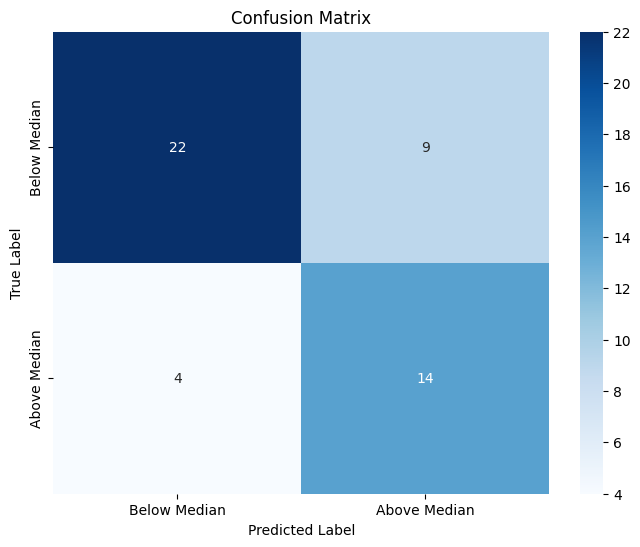

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical variables to dummy variables
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target
X = tips.drop('tip', axis=1)  # Drop the 'tip' column for features
y = (tips['tip'] > tips['tip'].median()).astype(int)  # Binary target based on median tip

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data

# Initialize and train the MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below Median', 'Above Median'], yticklabels=['Below Median', 'Above Median'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()